In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from scipy import misc
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from random import *
# from sklearn.tree import export_graphviz
from IPython import display
from sklearn.ensemble import RandomForestRegressor

In [2]:
red_blue = ["#19B5FE", "#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")
%matplotlib inline

In [3]:
data = pd.read_csv('../fraud.csv')
data.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2
count,2.457050e+05,245705.000000,2.457050e+05,245705.000000,245705.000000,245705.000000,245705.000000,245705.000000,245705.000000,245705.000000,245705.0,245705.000000
mean,3.195425e+06,0.074679,5.052010e+06,85.344136,9838.328406,389.268277,160.993366,190.774783,178.517291,51.884085,0.0,62.415836
std,1.598880e+05,0.262873,4.256722e+06,102.404792,5045.215613,162.473765,19.776664,46.910191,164.455230,42.389361,0.0,293.237861
min,2.987004e+06,0.000000,8.650600e+04,0.251000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,3.067334e+06,0.000000,1.728001e+06,26.283001,5679.000000,264.000000,150.000000,138.000000,0.000000,0.000000,0.0,0.000000
50%,3.137117e+06,0.000000,3.095021e+06,50.000000,9633.000000,408.000000,150.000000,224.000000,191.000000,87.000000,0.0,0.000000
75%,3.305531e+06,0.000000,7.929188e+06,100.000000,15063.000000,545.000000,185.000000,226.000000,315.000000,87.000000,0.0,0.000000
max,3.577534e+06,1.000000,1.581103e+07,1800.000000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,0.0,11623.000000


## Keep clean data that has no missing values.

In [4]:
clean_data = data.dropna()

In [5]:
clean_data.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2
count,9.282900e+04,92829.000000,9.282900e+04,92829.000000,92829.000000,92829.000000,92829.000000,92829.000000,92829.000000,92829.000000,92829.0,92829.000000
mean,3.167751e+06,0.047959,4.297952e+06,131.387056,9748.502203,392.048724,149.924377,198.523091,293.849153,86.751662,0.0,28.185352
std,1.494700e+05,0.213681,3.997180e+06,125.589385,5000.686200,164.265423,3.376893,45.153508,99.377643,4.748481,0.0,234.869723
min,2.987099e+06,0.000000,8.816200e+04,15.000000,1004.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,3.067808e+06,0.000000,1.733386e+06,50.000000,6019.000000,264.000000,150.000000,190.000000,204.000000,87.000000,0.0,0.000000
50%,3.098941e+06,0.000000,2.176484e+06,100.000000,9500.000000,399.000000,150.000000,226.000000,299.000000,87.000000,0.0,0.000000
75%,3.251450e+06,0.000000,6.388409e+06,150.000000,14349.000000,553.000000,150.000000,226.000000,330.000000,87.000000,0.0,0.000000
max,3.577531e+06,1.000000,1.581094e+07,1800.000000,18388.000000,600.000000,231.000000,237.000000,536.000000,102.000000,0.0,11623.000000


In [6]:
clean_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,addr2,dist1,dist2,P_emaildomain,R_emaildomain,OS,Browser,ScreenType,DeviceType,OSx
0,2988431,0,133636,150.0,R,11782,520,150,american express,190,...,87,0,0,anonymous.com,anonymous.com,Windows 10,chrome 62.0,1920x1080,desktop,Windows
1,2988431,0,133636,150.0,R,11782,520,150,american express,190,...,87,0,0,anonymous.com,anonymous.com,Windows 10,chrome 62.0,1920x1080,desktop,Windows
40,2987099,0,88162,75.0,R,1214,174,150,visa,226,...,87,0,0,gmail.com,gmail.com,iOS 11.0.3,mobile safari generic,1334x750,mobile,iOS Device
41,2987099,0,88162,75.0,R,1214,174,150,visa,226,...,87,0,0,gmail.com,gmail.com,iOS 11.0.3,mobile safari generic,1334x750,mobile,iOS Device
56,2987119,0,88484,100.0,H,2456,399,150,american express,118,...,87,0,0,anonymous.com,anonymous.com,Mac OS X 10_12_6,chrome 61.0,5120x2880,desktop,MacOS


In [7]:
train, test = train_test_split(clean_data, test_size = 0.30)
print("Training samples: {}; Test samples: {}".format(len(train), len(test)))

Training samples: 64980; Test samples: 27849


In [8]:
pos_TransactionDT = data[data['isFraud'] == 1]['TransactionDT']
neg_TransactionDT = data[data['isFraud'] == 0]['TransactionDT']
pos_TransactionAmt = data[data['isFraud'] == 1]['TransactionAmt']
neg_TransactionAmt = data[data['isFraud'] == 0]['TransactionAmt']


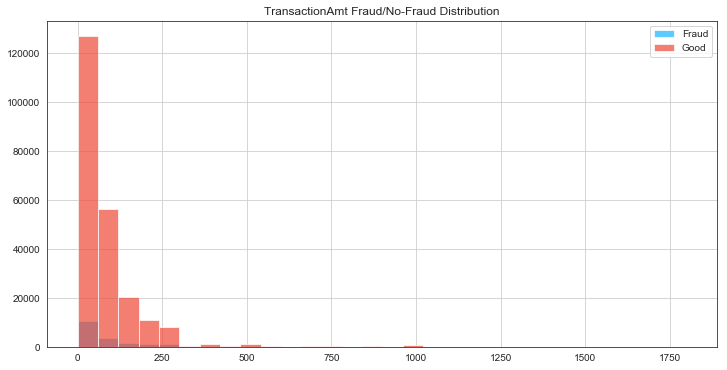

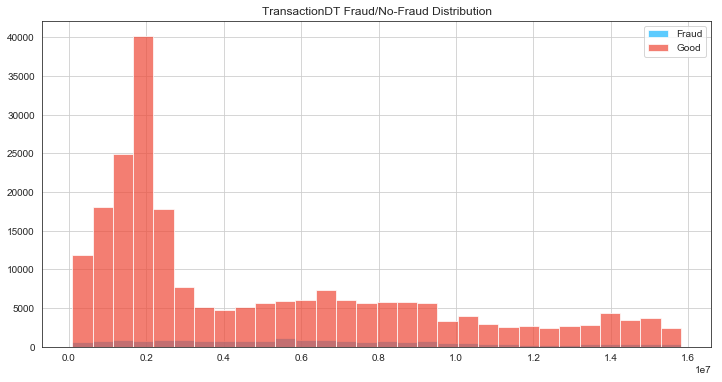

In [9]:
fig = plt.figure(figsize=(12, 6))
plt.title("TransactionAmt Fraud/No-Fraud Distribution")
pos_TransactionAmt.hist(alpha=0.7, bins=30, label='Fraud')
neg_TransactionAmt.hist(alpha=0.7, bins=30, label='Good')
plt.legend(loc="upper right")

fig = plt.figure(figsize=(12, 6))
plt.title("TransactionDT Fraud/No-Fraud Distribution")
pos_TransactionDT.hist(alpha=0.7, bins=30, label='Fraud')
neg_TransactionDT.hist(alpha=0.7, bins=30, label='Good')
plt.legend(loc="upper right")

## Build a Decision Tree Classifier based on a set of features

In [10]:
# Could refine min_samples_split, 
c = tree.DecisionTreeClassifier(min_samples_leaf=20, random_state=10)

In [11]:
features = ["TransactionDT", "TransactionAmt", "card1", "card2", "card3", "card5", "dist1", "dist2","addr1","addr2"]

X_train = train[features]
y_train = train["isFraud"]

X_test = test[features]
y_test = test["isFraud"]

dt = c.fit(X_train, y_train)

In [12]:
y_pred = c.predict(X_test)

In [13]:
score = accuracy_score(y_test, y_pred) * 100
rounded_score = round(score, 1)
print("Decision Tree Classifier Accuracy: {}%".format(rounded_score))

Decision Tree Classifier Accuracy: 95.6%


## Use Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
forest_y_pred = clf.predict(X_test)
score = accuracy_score(y_test, forest_y_pred) * 100
rounded_score = round(score, 1)
print("Random Forest (n_est: 100) Accuracy: {}%".format(rounded_score))

Random Forest (n_est: 100) Accuracy: 98.8%


## Display feature performances for effective variables 

In [16]:
forest = clf

In [17]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


In [18]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.335024)
2. feature 2 (0.170866)
3. feature 8 (0.139072)
4. feature 1 (0.128124)
5. feature 3 (0.113796)
6. feature 5 (0.067188)
7. feature 7 (0.019221)
8. feature 4 (0.017423)
9. feature 9 (0.009286)
10. feature 6 (0.000000)


### Features: 
0 - "TransactionDT", 
1 - "TransactionAmt", 
2 - "card1", 
3 - "card2", 
4 - "card3", 
5 - "card5", 
6 - "dist1", 
7 - "dist2",
8 - "addr1",
9 - "addr2"

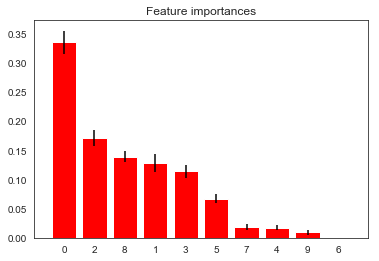

In [19]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### Features: 
0 - "TransactionDT", 
1 - "TransactionAmt", 
2 - "card1", 
3 - "card2", 
4 - "card3", 
5 - "card5", 
6 - "dist1", 
7 - "dist2",
8 - "addr1",
9 - "addr2"

In [20]:
feature_importances = pd.DataFrame(forest.feature_importances_,

                                   index = X_train.columns,

                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
TransactionDT,0.335024
card1,0.170866
addr1,0.139072
TransactionAmt,0.128124
card2,0.113796
card5,0.067188
dist2,0.019221
card3,0.017423
addr2,0.009286
dist1,0.000000
